In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#import csv
cta_df = pd.read_csv("CTA_Ridership.csv")
cta_df

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343
...,...,...,...,...,...
7331,11/26/2020,U,119470,56839,176309
7332,11/27/2020,W,221878,106692,328570
7333,11/28/2020,A,198860,97141,296001
7334,11/29/2020,U,145682,76276,221958


In [4]:
#grab 2019 dates
first_df = cta_df[6636:6879]
second_df = cta_df[6953:7074]

#merge dataframes
full_2019 = pd.merge(first_df, second_df, how='outer')

#change service_date column to string for easier manipulation
full_2019 = full_2019.astype({'service_date':'string'})
#split service_date column to isolate months
full_2019.service_date = full_2019.service_date.str.split('/', expand=True)
#recast service_date as int
full_2019 = full_2019.astype({'service_date':'int64'})
#bin and group by month
month_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_2019['Month'] = pd.cut(full_2019['service_date'], month_numbers, labels=month_names)
month_grouped_2019 = full_2019.groupby(['Month']).sum()
#drop service_date column
month_grouped_2019 = month_grouped_2019.drop(columns=['service_date'])
month_grouped_2019

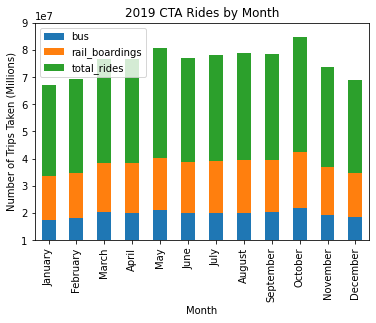

In [4]:
#make a bar graph of 2019 CTA travel
month_grouped_2019.plot.bar(stacked=True)
plt.ylim(10000000, 90000000)
plt.title("2019 CTA Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips Taken (Millions)")
fig = plt.gcf()
fig.savefig("2019plot.png");

In [5]:
#grab 2020 dates
third_df = cta_df[6879:6952]
fourth_df = cta_df[7075:]

#merge dataframes
full_2020 = pd.merge(third_df, fourth_df, how='outer')

#change service_date column to string for easier manipulation
full_2020 = full_2020.astype({'service_date':'string'})
#split service_date column to isolate months
full_2020.service_date = full_2020.service_date.str.split('/', expand=True)
#recast service_date as int
full_2020 = full_2020.astype({'service_date':'int64'})
full_2020['Month'] = pd.cut(full_2020['service_date'], month_numbers, labels=month_names)
month_grouped_2020 = full_2020.groupby(['Month']).sum()
month_grouped_2020 = month_grouped_2020.drop(columns=['service_date'])
month_grouped_2020

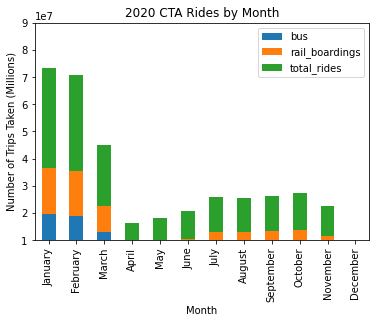

In [8]:
#make a bar graph of 2019 CTA travel
month_grouped_2020.plot.bar(stacked=True)
plt.ylim(10000000, 90000000)
plt.title("2020 CTA Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips Taken (Millions)")
fig2 = plt.gcf()
fig2.savefig("2020plot.png");